In [1]:
import pandas as pd;
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt;
%matplotlib inline

In [2]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds


#predict_step(['doctor.e16ba4e4.jpg']) # ['a woman in a hospital bed with a woman in a hospital bed']



In [3]:

from transformers import pipeline

image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

image_to_text("https://ankur3107.github.io/assets/images/image-captioning-example.png")

# [{'generated_text': 'a soccer game with a player jumping to catch the ball '}]



Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
C:\Users\dma\anaconda3\envs\VRL_TF_GPU\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
C:\Users\dma\anaconda3\envs\VRL_TF_GPU\lib\site-packages\transformers\generation\utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'a soccer game with a player jumping to catch the ball '}]

### For batch processing our images

In [4]:
import os;
import time;

In [5]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 5ADA-A407

 Directory of C:\Users\dma\Downloads\VRL_DB_backup\VRL_DB_Proj_Backup

07/12/2023  05:44 PM    <DIR>          .
07/12/2023  05:44 PM    <DIR>          ..
07/07/2023  05:10 PM    <DIR>          .ipynb_checkpoints
07/07/2023  05:10 PM    <DIR>          A08-077
05/03/2023  05:17 PM       337,099,045 A08-077.zip
07/07/2023  03:36 PM            69,378 A08-077_data.csv
05/13/2023  04:13 PM             7,775 environment.yml
05/13/2023  04:07 PM                 0 environment_VRL_DB.yml
05/31/2023  03:03 PM            17,628 Installed_packages_in_env.txt
07/12/2023  05:28 PM         1,071,539 NN_VRL_DB.ipynb
05/31/2023  02:34 PM            17,381 Untitled.ipynb
07/12/2023  05:44 PM    <DIR>          vit-gpt2-coco-en-ckpts
07/12/2023  05:44 PM    <DIR>          vit-gpt2-image-captioning
07/12/2023  04:17 PM         6,562,509 VRL_image_db.csv
               8 File(s)    344,845,255 bytes
               6 Dir(s)  1,227,428,306,94

In [6]:
#!cd vit-gpt2-image-captioning/Data

In [7]:
# hardcoding the path; might be different in different environments!!!
Path = 'vit-gpt2-image-captioning\Data'

In [8]:
# test
test_img = [Path + '\\' + os.listdir(Path)[826]]
test_img

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'vit-gpt2-image-captioning\\Data'

In [9]:
predict_step(test_img)


NameError: name 'test_img' is not defined

### Tests run successfully, going to try pretraining the model(s) to get desired results

#### 1) extract labels from sql database entry(ies) associated with each image 

In [ ]:
import pymysql as psql;

In [ ]:
'''
connection = psql.connect(host='cha-cdbs-e01.sjsu.edu',
                          user='bob', 
                          password='OLIO56',
                          database='vrl_images',
                          charset='utf8mb4',
                          cursorclass=psql.cursors.DictCursor)
'''

In [ ]:
#!conda list

In [9]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 5ADA-A407

 Directory of C:\Users\dma\Downloads\shahbaz_VRL_DB_git\ongoing_Image_capt

07/12/2023  04:30 PM    <DIR>          .
07/12/2023  04:30 PM    <DIR>          ..
07/07/2023  04:52 PM    <DIR>          .ipynb_checkpoints
05/03/2023  05:17 PM       337,099,045 A08-077.zip
07/07/2023  03:36 PM            69,378 A08-077_data.csv
05/13/2023  04:13 PM             7,775 environment.yml
05/13/2023  04:07 PM                 0 environment_VRL_DB.yml
05/31/2023  03:03 PM            17,628 Installed_packages_in_env.txt
07/12/2023  04:30 PM           446,477 NN_VRL_DB.ipynb
05/31/2023  02:34 PM            17,381 Untitled.ipynb
05/31/2023  02:53 PM    <DIR>          vit-gpt2-coco-en-ckpts
05/31/2023  03:00 PM    <DIR>          vit-gpt2-image-captioning
07/12/2023  04:17 PM         6,562,509 VRL_image_db.csv
               8 File(s)    344,220,193 bytes
               5 Dir(s)  1,263,575,302,144 bytes free


In [136]:
#df = pd.read_csv('A08-077_data.csv');
df = pd.read_csv('VRL_image_db.csv');
df

,agent1_name,agent2_name,attribution,title,date,style,culture,image_description,image_path,image_filename
0,"Lombardo, Pietro",NaN,NaN,"West Portal, San Giobbe",c. 1470,Renaissance,Italian,NaN,A08/A08-003,A08-003-0001.jpg
1,"Buon, Pietro",NaN,NaN,Main Portal to the Campo of Scuola Grande di S...,c. 1520-1524,Renaissance,Italian,NaN,A08/A08-003,A08-003-0002.jpg
2,"Rizzo, Antonio",NaN,NaN,Arco Foscari,c. 1460,Renaissance,Italian,NaN,A08/A08-003,A08-003-0003.jpg
3,"Gambello, Antonio",NaN,NaN,Arsenale,c. 1460 (gateway),"Veneto-Byzantine, Renaissance",Italian,Entablature,A08/A08-003,A08-003-0004.jpg
4,"Codussi, Mauro",NaN,NaN,San Michele in Isola,1469-1475,Renaissance,Italian,Nave,A08/A08-003,A08-003-0005.jpg
...,...,...,...,...,...,...,...,...,...,...
61038,"Oliver, Isaac",NaN,(attributed to),Elizabeth I (Elizabeth I and the Three Goddesses),c. 1588,Renaissance,French,NaN,A23/A23-002,A23-002-060.jpg
61039,NaN,NaN,NaN,Queen Elizabeth I,c. 1599,Renaissance,English,NaN,A23/A23-002,A23-002-061.jpg
61040,"Gheeraerts, Marcus, the younger",NaN,(attributed to),Elizabeth I of England (The Ditchley Portrait),c. 1592,Renaissance,Flemish,NaN,A23/A23-002,A23-002-062.jpg
61041,"Gheeraerts, Marcus, the younger",NaN,(attributed to),Elizabeth I (The Rainbow Portrait),c. 1602,Renaissance,Flemish,NaN,A23/A23-002,A23-002-063.jpg


In [11]:
df.shape

(61043, 10)

In [12]:
df.columns

Index(['agent1_name', 'agent2_name', 'attribution', 'title', 'date', 'style',
       'culture', 'image_description', 'image_path', 'image_filename'],
      dtype='object')

Now that we have the dataset, let's cross reference the images that we DO have the data for and try to train + run the model on that.

# Exploratory Data Analysis

Since the image files that we have is 1122 and the image files contained in our dataset are about 728, we can break down the project's first phase into the following tasks:<br>
<t>~~- cross reference image file names with file names in dataset~~<br>
<t>~~- remove redundant columns such as job specific agent columns~~<br>
<t>- concatenate the descriptive words to train the model. Discussions to be had regarding this <br>
    &nbsp;&nbsp;&nbsp;* Multiple NNs working simultaneously to generate feature specific labels? (i.e. change the target variable for training to alterative features and make multiple &nbsp;&nbsp;&nbsp;&nbsp; models)<br>
    &nbsp;&nbsp;&nbsp;* Make the model predict all keywords in a concatenated string <br>
    &nbsp;&nbsp;&nbsp;* Misc. : NLP n-gram approaches for artist-based categorization of works??<br>
<br> <strong> NOTE:</strong> Data visualization for evaluation

## dataframe data breakdown

In [13]:
df.head()

,agent1_name,agent2_name,attribution,title,date,style,culture,image_description,image_path,image_filename
0,"Lombardo, Pietro",NaN,NaN,"West Portal, San Giobbe",c. 1470,Renaissance,Italian,NaN,A08/A08-003,A08-003-0001.jpg
1,"Buon, Pietro",NaN,NaN,Main Portal to the Campo of Scuola Grande di S...,c. 1520-1524,Renaissance,Italian,NaN,A08/A08-003,A08-003-0002.jpg
2,"Rizzo, Antonio",NaN,NaN,Arco Foscari,c. 1460,Renaissance,Italian,NaN,A08/A08-003,A08-003-0003.jpg
3,"Gambello, Antonio",NaN,NaN,Arsenale,c. 1460 (gateway),"Veneto-Byzantine, Renaissance",Italian,Entablature,A08/A08-003,A08-003-0004.jpg
4,"Codussi, Mauro",NaN,NaN,San Michele in Isola,1469-1475,Renaissance,Italian,Nave,A08/A08-003,A08-003-0005.jpg


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61043 entries, 0 to 61042
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   agent1_name        50007 non-null  object
 1   agent2_name        2006 non-null   object
 2   attribution        1949 non-null   object
 3   title              61041 non-null  object
 4   date               60767 non-null  object
 5   style              49804 non-null  object
 6   culture            60925 non-null  object
 7   image_description  6098 non-null   object
 8   image_path         61043 non-null  object
 9   image_filename     61043 non-null  object
dtypes: object(10)
memory usage: 4.7+ MB


In [15]:
df.describe()

,agent1_name,agent2_name,attribution,title,date,style,culture,image_description,image_path,image_filename
count,50007,2006,1949,61041,60767,49804,60925,6098,61043,61043
unique,7663,549,9,41171,8599,943,151,4333,731,61005
top,"Picasso, Pablo","Lützelburger, Hans",(attributed to),Untitled,1913,Renaissance,American,Facade,A12/A12-001,A10-156-036.jpg
freq,590,51,795,777,457,8976,11030,75,1112,2


Text(0.5, 1.0, 'Visual representation of null values in dataset')

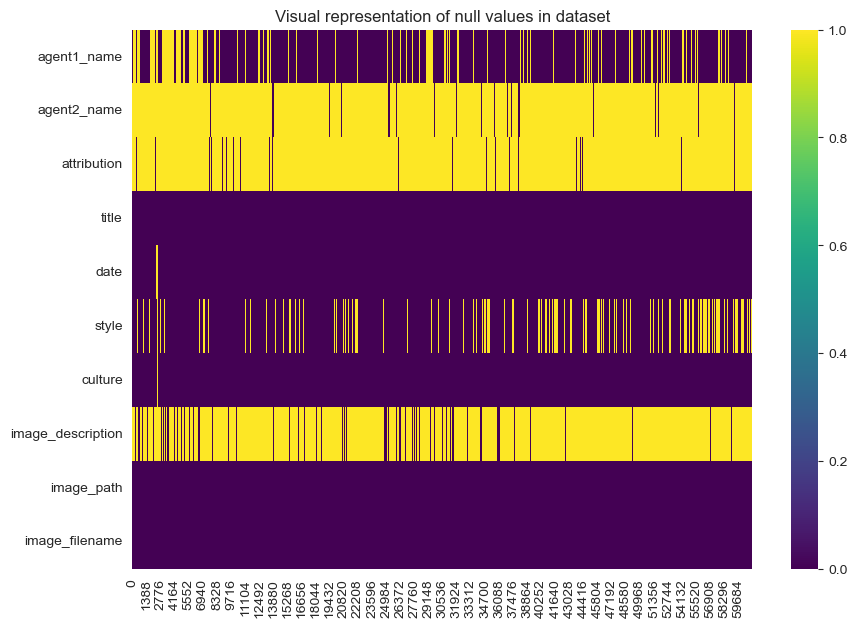

In [16]:
sns.set_style('darkgrid');
plt.figure(figsize = (10, 7))
sns.heatmap(df.isnull().transpose(), cmap = 'viridis')
plt.title('Visual representation of null values in dataset')

In [19]:
#df['works::work_display_attribution'].value_counts()
df['attribution'].value_counts()

(attributed to)       795
(from a design by)    518
(workshop of)         176
(and workshop)        155
(copy after)          108
(circle of)            74
(follower of)          69
(and others)           36
(school of)            18
Name: attribution, dtype: int64

In [20]:
df[df['attribution'] == '(from a design by)']

,agent1_name,agent2_name,attribution,title,date,style,culture,image_description,image_path,image_filename
2469,Arnolfo di Cambio,NaN,(from a design by),Florence Cathedral (Santa Maria del Fiore),1296 - 1350,Gothic,Italian,NaN,A08/A08-077,A08-077-0539.jpg
2470,Arnolfo di Cambio,NaN,(from a design by),Florence Cathedral (Santa Maria del Fiore),1296 - 1350,Gothic,Italian,NaN,A08/A08-077,A08-077-0540.jpg
2576,"Aelst, Pieter van, the younger","Raphael (Sanzio, Raphael)",(from a design by),Miraculous Draft of Fishes,1515-1516,Renaissance,Flemish,NaN,A08/A08-077,A08-077-0696.jpg
2594,"Buonarroti, Michelangelo",NaN,(from a design by),Saint Peter's Basilica,c. 1546-1564,Renaissance,Italian,NaN,A08/A08-077,A08-077-0739.jpg
2718,"Cousen, John","Turner, Joseph Mallord William",(from a design by),Hannibal Crossing the Alps,1859,Romantic,English,NaN,A08/A08-077,A08-077-1013.jpg
...,...,...,...,...,...,...,...,...,...,...
60879,"Coecke van Aelst, Pieter, the elder",NaN,(from a design by),The Story of the Creation: The Expulsion of Ad...,c. 1547-1548,Renaissance,Flemish,NaN,A22/A22-002,A22-002-027.jpg
60980,"Vermeyen, Jan Cornelis",NaN,(from a design by),Muster of the Troops at Barcelona,1548-1551,Renaissance,Flemish,NaN,A23/A23-002,A23-002-002.jpg
60988,"Holbein, Hans, the younger",NaN,(from a design by),Title Page for the Coverdale Bible,1535,Renaissance,German,NaN,A23/A23-002,A23-002-010.jpg
60995,"Rogers, William","Heere, Lucas de",(from a design by),Allegory of the Tudor Dynasty,c. 1595-1600,Renaissance,English,NaN,A23/A23-002,A23-002-017.jpg


Text(0.5, 1.0, 'Number of items in each work style category')

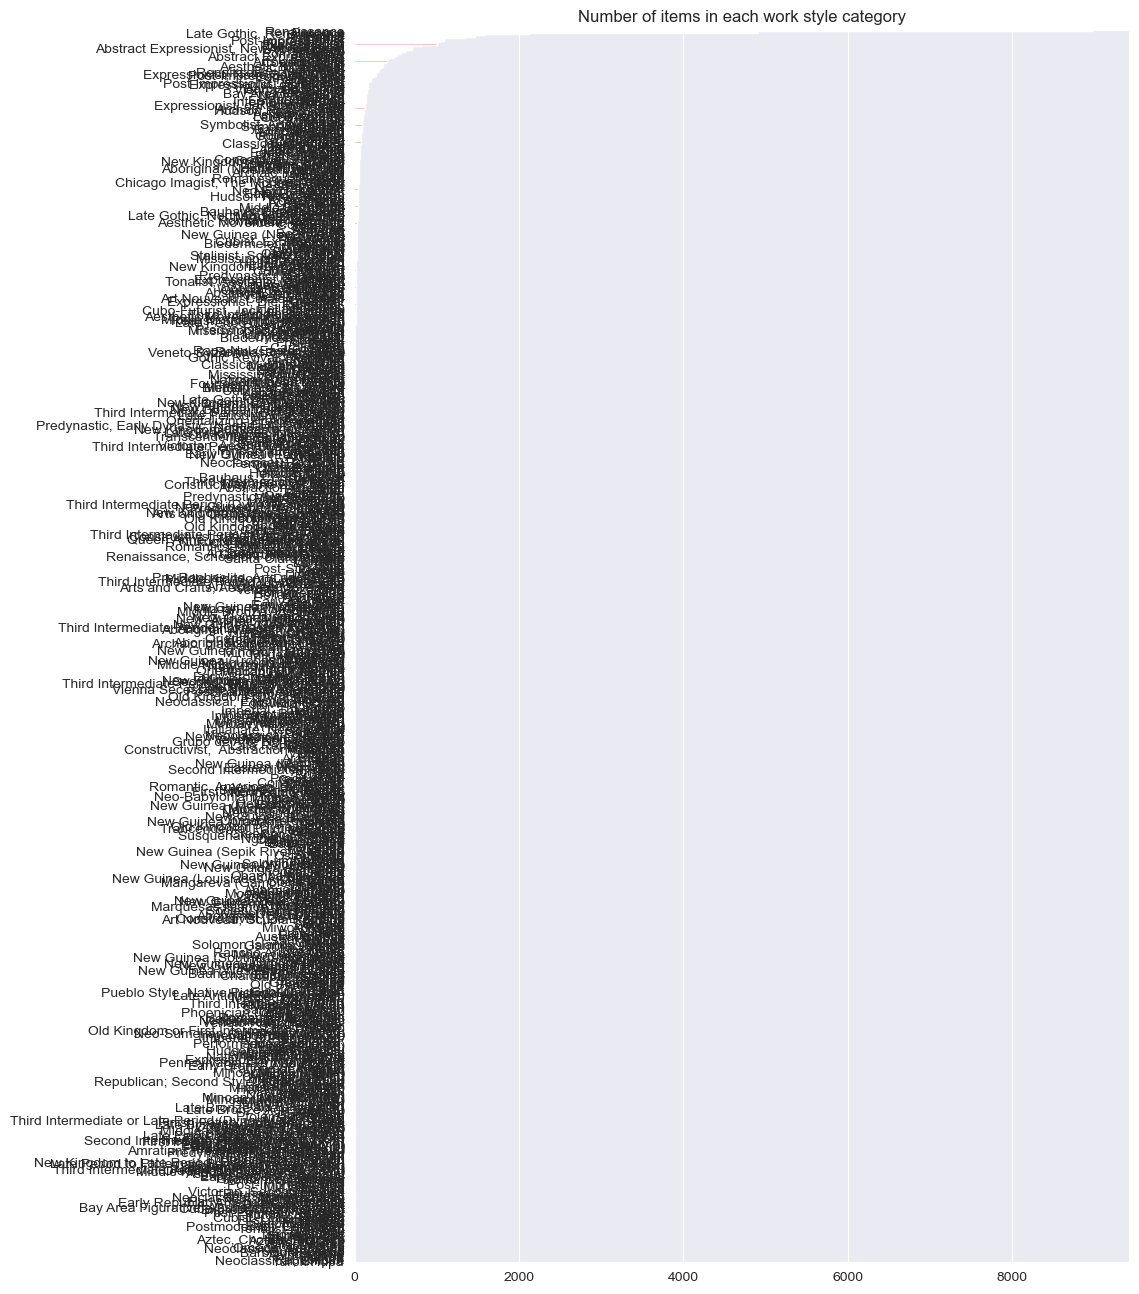

In [21]:
plt.figure(figsize = (10, 16))
#sns.barplot(y = df['works::work_style'].value_counts().index, x = df['works::work_style'].value_counts().values)
sns.barplot(y = df['style'].value_counts().index, x = df['style'].value_counts().values)
plt.title('Number of items in each work style category')


Text(0.5, 1.0, 'Number of items in each work culture category')

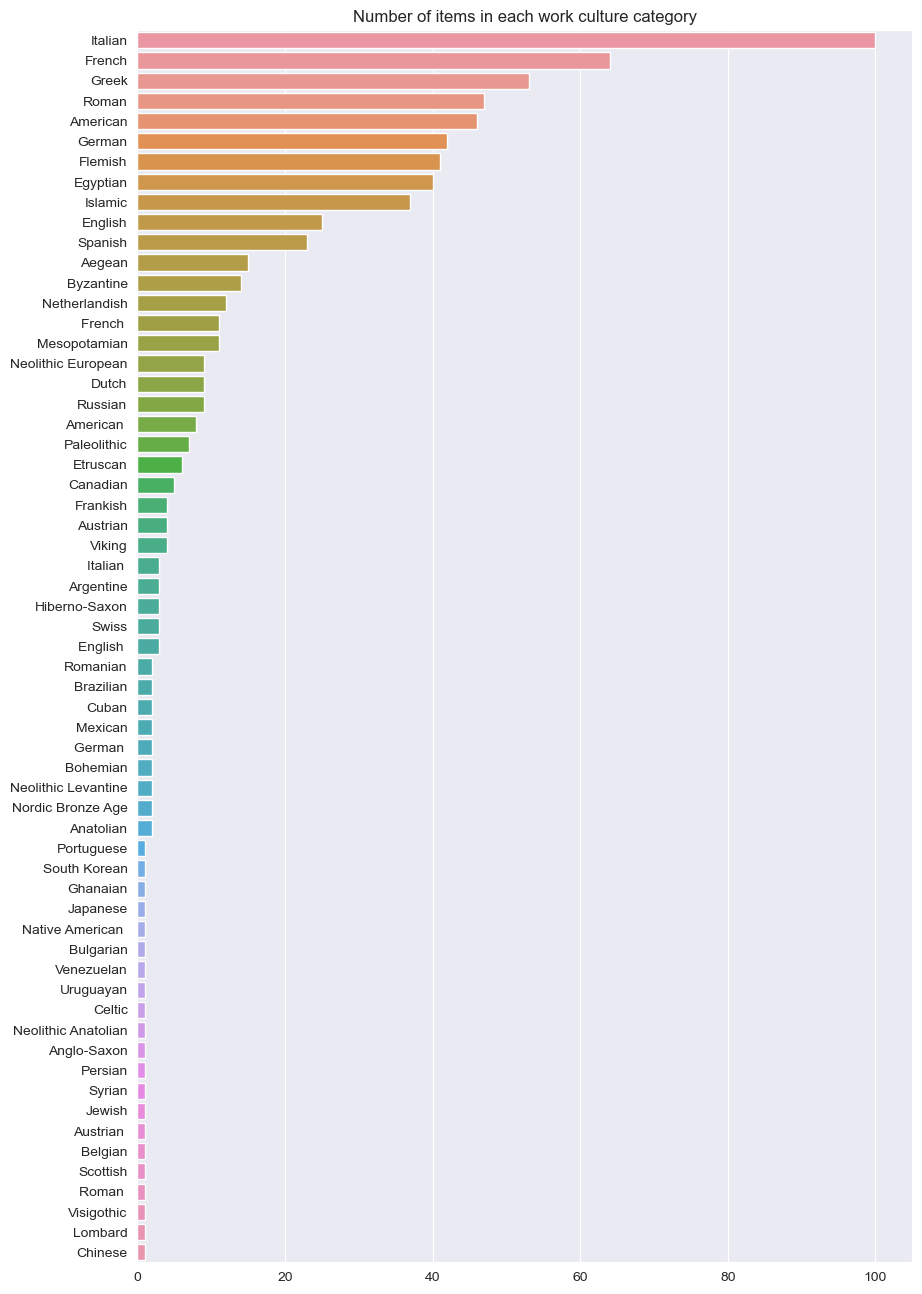

In [55]:
plt.figure(figsize = (10, 16))
sns.barplot(y = df['works::work_culture'].value_counts().index, x = df['works::work_culture'].value_counts().values)
plt.title('Number of items in each work culture category')


In [22]:
#plt.figure(figsize = (10, 16))
#sns.barplot(y = df['works::work_date'].value_counts().index, x = df['works::work_date'].value_counts().values)
#plt.title('Number of items in each work-date category')
#df['works::work_date'].value_counts()
df['date'].value_counts()

1913            457
1912            411
1914            403
1920            335
1917            328
               ... 
c. 1632-1637      1
c. 1661-1662      1
after 1746        1
after 1784        1
1532-1535         1
Name: date, Length: 8599, dtype: int64

In [67]:
length_of_date_vals = (pd.Series(df['date'].value_counts().index)).apply(lambda x: len(x)).value_counts()
#len(length_of_date_vals)
length_of_date_vals.index = pd.Series(length_of_date_vals.index).apply(lambda x: str(x))
length_of_date_vals.index

Index(['12', '9', '7', '10', '4', '11', '16', '14', '6', '5', '13', '8', '15',
       '20', '3', '17', '19', '18', '23', '26', '24', '21', '2', '29', '28',
       '31', '30', '34', '27', '36', '33', '38', '40', '41', '25', '46', '48',
       '37', '35', '22', '32'],
      dtype='object')

Text(0.5, 1.0, 'Graph for length of date values (based on characters)')

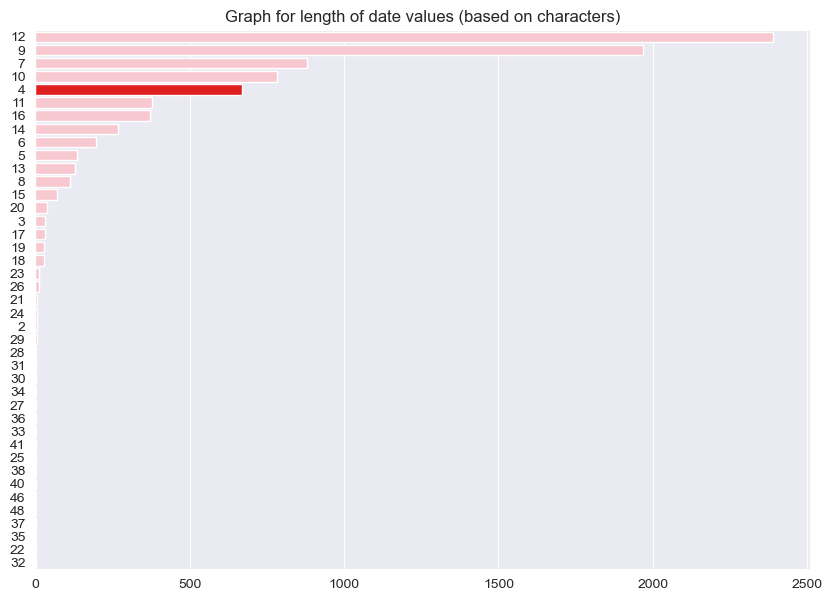

In [79]:
plt.figure(figsize = (10, 7))
clrs = ['red' if (y == '4') else 'pink' for y in length_of_date_vals.sort_values(ascending = False).index]
#sns.barplot(y = (pd.Series(df['date'].value_counts().index)).apply(lambda x: len(x)).value_counts().index, x = (pd.Series(df['date'].value_counts().index)).apply(lambda x: len(x)).value_counts().values, palette = 'coolwarm')
sns.barplot(y = length_of_date_vals.sort_values(ascending = False).index, x = length_of_date_vals.sort_values(ascending = False).values, palette = clrs, )
plt.title ('Graph for length of date values (based on characters)')

In [14]:
#plt.figure(figsize = (10, 16))
#sns.barplot(y = df['works::work_style'].value_counts().index, x = df['works::work_style'].value_counts().values)
#sns.barplot(y = df['style'].value_counts().index, x = df['style'].value_counts().values)
#plt.title('Number of items in each work style category')

## The number of styles that are truly represented in the dataset 
## (counts double style values in union mode instead of intersection)
true_styles_exclusive = df['style'].apply(lambda x: str(x).split(',') if (str(x).find(',') > -1) else str(x))
true_styles_exclusive

0                             Renaissance
1                             Renaissance
2                             Renaissance
3        [Veneto-Byzantine,  Renaissance]
4                             Renaissance
                       ...               
61038                         Renaissance
61039                         Renaissance
61040                         Renaissance
61041                         Renaissance
61042                         Renaissance
Name: style, Length: 61043, dtype: object

In [68]:
## convert data style values into count-tuples/maps where the key value is the style and the paired number indicates
## its respective count in the dataset
counter = 0
styles = dict()
for i in true_styles_exclusive:
        
    if type(i) == list:
        #counter += 1
        for j in i:
            if not(j in styles):
                styles[j.strip()] = 1
            else:
                styles[j.strip()] = styles[j.strip()] + 1 
            
        
    else:
        if not(i in styles):
            str().strip()
            styles[i.strip()] = 1
        else:
            styles[i.strip()] = styles[i.strip()] + 1
#styles

styles = pd.Series(styles);
styles = styles.sort_values(ascending  = False)
styles
#print ('counter: ', counter)

nan              11239
Late Gothic       2216
Baroque           1182
Cubist             712
Impressionist      673
                 ...  
Jomon                1
Rebublican           1
Bauhasu              1
Median               1
Yurok/Hupa           1
Length: 779, dtype: int64

In [89]:
#len(styles)
#counter = 0
#for k, v in styles.items():
    #if v <=1:
    #    counter += 1;
    #    print (k, ": ", v, '\n')
    #if v > 1:
    #    counter += 1;
        #print (k, ": ", v, '\n')
        
#counter
styles.values[199]

7

Text(0.5, 1.0, 'Number of items per style category in our dataset (union mode)')

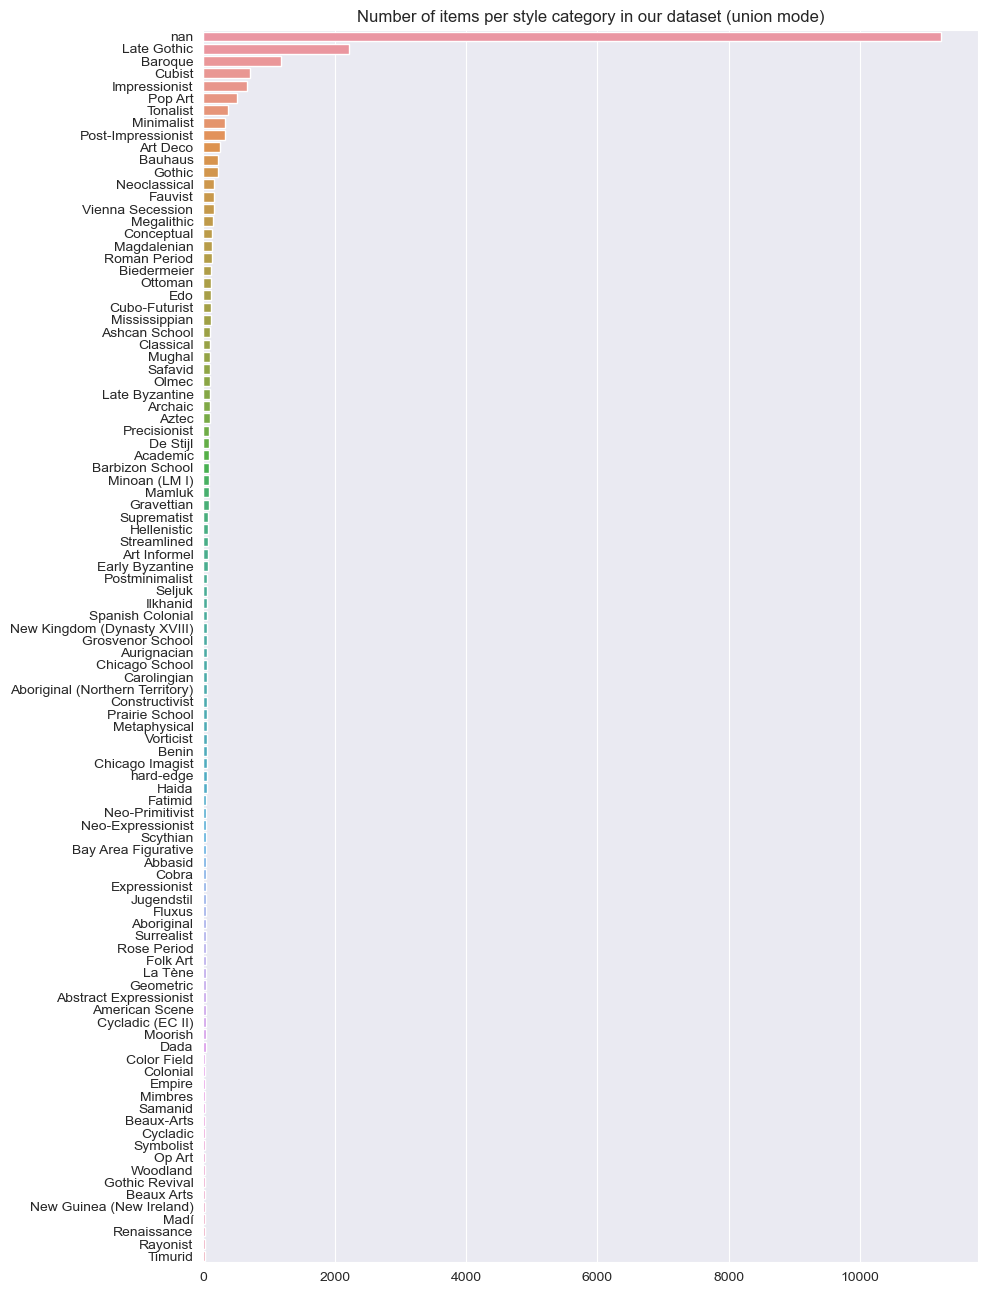

In [96]:
sns.set_style('darkgrid')
# to limit number of items on graph to make it legible
upper_limiter = 0; # omitting 'nan' values; they are the most common; maybe use for testing??
lower_limiter = 100;


## plotting a graph of styles in our dataset

plt.figure(figsize = (10, 16))
#sns.barplot(y = df['works::work_style'].value_counts().index, x = df['works::work_style'].value_counts().values)
sns.barplot(y = styles.keys()[upper_limiter:lower_limiter], x = styles.values[upper_limiter: lower_limiter])
plt.title('Number of items per style category in our dataset (union mode)')


In [87]:
#styles.items()

In [90]:
#pd.Series(df['date'].value_counts().index)[(pd.Series(df['date'].value_counts().index)).apply(lambda x: len(x) == 12)]

### cross reference image file names with file names in dataset

In [91]:
df['image_filename'].head()

0    A08-003-0001.jpg
1    A08-003-0002.jpg
2    A08-003-0003.jpg
3    A08-003-0004.jpg
4    A08-003-0005.jpg
Name: image_filename, dtype: object

In [92]:
#Path + '\\' + os.listdir(Path)[826]
image_files = pd.DataFrame(os.listdir(Path));
image_files.columns = ['image_filename'];
image_files

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'vit-gpt2-image-captioning\\Data'

In [65]:
pd.merge(left = df['image_filename'], right = image_files, how = 'inner')

,image_filename
0,A08-077-0001.jpg
1,A08-077-0003.jpg
2,A08-077-0005.jpg
3,A08-077-0007.jpg
4,A08-077-0011.jpg
...,...
723,A08-077-1189.jpg
724,A08-077-1190.jpg
725,A08-077-1191.jpg
726,A08-077-1194.jpg


In [98]:
df['image_filename'].isin(image_files['image_filename']).sum()

728

In [87]:
from tqdm import tqdm

In [86]:
image_files['image_filename'] = image_files['image_filename'].apply(lambda x: str(x))

In [94]:
image_files['image_filename'][0] == df['image_filename'][0]

True

In [103]:
df[df['image_filename'].isin(image_files['image_filename'])]

,image_filename,agents::agent_name,agents 2::agent_name,works::work_display_attribution,works::work_title,works::work_style,works::work_culture,works::work_date,image_description
0,A08-077-0001.jpg,NaN,NaN,NaN,Chauvet Cave,Aurignacian,Paleolithic,"c. 30,000-28,000 BCE","Horses, Rhinoceroses and Aurochs"
1,A08-077-0003.jpg,NaN,NaN,NaN,Lion-Human,Aurignacian,Paleolithic,"c. 40,000 BCE",NaN
2,A08-077-0005.jpg,NaN,NaN,NaN,Torso of a Woman,Gravettian,Paleolithic,"c. 23,000 BCE",NaN
3,A08-077-0007.jpg,NaN,NaN,NaN,Peche-Merle Cave,Gravettian,Paleolithic,"25,000-15,000 BCE",Spotted Horses and Human Hands
4,A08-077-0011.jpg,NaN,NaN,NaN,Le Tuc d’Audoubert Cave,Magdalenian,Paleolithic,"c. 13,000 BCE",Bison
...,...,...,...,...,...,...,...,...,...
723,A08-077-1189.jpg,"Neshat, Shirin",NaN,NaN,Production Stills from Fervor,NaN,American,2000,NaN
724,A08-077-1190.jpg,"Neshat, Shirin",NaN,NaN,Production Stills from Fervor,NaN,American,2000,NaN
725,A08-077-1191.jpg,Gu Wenda,NaN,NaN,United Nations - Babel of the Millennium,NaN,Chinese,1999,NaN
726,A08-077-1194.jpg,"Chicago, Judy (Cohen, Judy)",NaN,NaN,The Dinner Party,Feminist,American,1974-1979,Mary Wollestonecraft


In [111]:
images_not_in_df = image_files[image_files['image_filename'].isin(df['image_filename']).apply(lambda x: not x)];
images_not_in_df

,image_filename
148,A08-077-0222.jpg
150,A08-077-0224.jpg
152,A08-077-0226.jpg
153,A08-077-0227.jpg
160,A08-077-0234.jpg
...,...
1107,A08-077-1181.jpg
1108,A08-077-1182.jpg
1109,A08-077-1183.jpg
1118,A08-077-1192.jpg


### remove redundant columns such as job specific agent columns

In [114]:
df.head()
df.columns

Index(['image_filename', 'agents::agent_name', 'agents 2::agent_name',
       'works::work_display_attribution', 'works::work_title',
       'works::work_style', 'works::work_culture', 'works::work_date',
       'image_description'],
      dtype='object')

In [116]:
df = df.drop(['agents::agent_name', 'agents 2::agent_name', 'works::work_display_attribution'], axis = 1);
df.head()

,image_filename,works::work_title,works::work_style,works::work_culture,works::work_date,image_description
0,A08-077-0001.jpg,Chauvet Cave,Aurignacian,Paleolithic,"c. 30,000-28,000 BCE","Horses, Rhinoceroses and Aurochs"
1,A08-077-0003.jpg,Lion-Human,Aurignacian,Paleolithic,"c. 40,000 BCE",NaN
2,A08-077-0005.jpg,Torso of a Woman,Gravettian,Paleolithic,"c. 23,000 BCE",NaN
3,A08-077-0007.jpg,Peche-Merle Cave,Gravettian,Paleolithic,"25,000-15,000 BCE",Spotted Horses and Human Hands
4,A08-077-0011.jpg,Le Tuc d’Audoubert Cave,Magdalenian,Paleolithic,"c. 13,000 BCE",Bison


In [24]:
temp = {'1' : 123}
123 in temp.keys()

False

## Data Preprocessing [for predicting style]

<s>&nbsp;&nbsp;&nbsp;&nbsp; - Remove redundant columns </s><br>
<s>&nbsp;&nbsp;&nbsp;&nbsp; - Copy null style values and keep them for deployment test</s><br>
&nbsp;&nbsp;&nbsp;&nbsp; - drop nulls from training dataset<br>
&nbsp;&nbsp;&nbsp;&nbsp; - reduce abundant data style values to make train dataset more balanced (maybe smote for the fewer examples??)<br>
&nbsp;&nbsp;&nbsp;&nbsp; - reset index <br>
&nbsp;&nbsp;&nbsp;&nbsp; - one hot encode by style<br>
&nbsp;&nbsp;&nbsp;&nbsp; - load up images<br>

In [137]:
df = df.drop(columns = ['agent1_name', 'agent2_name', 'attribution'])
df_style_deployment_set = df[(df['style'].isnull())].copy(deep = True);
#df[(df['style'].isnull())].drop(columns = ['agent1_name', 'agent2_name', 'attribution'])
df

,title,date,style,culture,image_description,image_path,image_filename
0,"West Portal, San Giobbe",c. 1470,Renaissance,Italian,NaN,A08/A08-003,A08-003-0001.jpg
1,Main Portal to the Campo of Scuola Grande di S...,c. 1520-1524,Renaissance,Italian,NaN,A08/A08-003,A08-003-0002.jpg
2,Arco Foscari,c. 1460,Renaissance,Italian,NaN,A08/A08-003,A08-003-0003.jpg
3,Arsenale,c. 1460 (gateway),"Veneto-Byzantine, Renaissance",Italian,Entablature,A08/A08-003,A08-003-0004.jpg
4,San Michele in Isola,1469-1475,Renaissance,Italian,Nave,A08/A08-003,A08-003-0005.jpg
...,...,...,...,...,...,...,...
61038,Elizabeth I (Elizabeth I and the Three Goddesses),c. 1588,Renaissance,French,NaN,A23/A23-002,A23-002-060.jpg
61039,Queen Elizabeth I,c. 1599,Renaissance,English,NaN,A23/A23-002,A23-002-061.jpg
61040,Elizabeth I of England (The Ditchley Portrait),c. 1592,Renaissance,Flemish,NaN,A23/A23-002,A23-002-062.jpg
61041,Elizabeth I (The Rainbow Portrait),c. 1602,Renaissance,Flemish,NaN,A23/A23-002,A23-002-063.jpg


In [138]:
## drop null style value data points
df = df.drop(df_style_deployment_set.index, axis = 0)
df

,title,date,style,culture,image_description,image_path,image_filename
0,"West Portal, San Giobbe",c. 1470,Renaissance,Italian,NaN,A08/A08-003,A08-003-0001.jpg
1,Main Portal to the Campo of Scuola Grande di S...,c. 1520-1524,Renaissance,Italian,NaN,A08/A08-003,A08-003-0002.jpg
2,Arco Foscari,c. 1460,Renaissance,Italian,NaN,A08/A08-003,A08-003-0003.jpg
3,Arsenale,c. 1460 (gateway),"Veneto-Byzantine, Renaissance",Italian,Entablature,A08/A08-003,A08-003-0004.jpg
4,San Michele in Isola,1469-1475,Renaissance,Italian,Nave,A08/A08-003,A08-003-0005.jpg
...,...,...,...,...,...,...,...
61038,Elizabeth I (Elizabeth I and the Three Goddesses),c. 1588,Renaissance,French,NaN,A23/A23-002,A23-002-060.jpg
61039,Queen Elizabeth I,c. 1599,Renaissance,English,NaN,A23/A23-002,A23-002-061.jpg
61040,Elizabeth I of England (The Ditchley Portrait),c. 1592,Renaissance,Flemish,NaN,A23/A23-002,A23-002-062.jpg
61041,Elizabeth I (The Rainbow Portrait),c. 1602,Renaissance,Flemish,NaN,A23/A23-002,A23-002-063.jpg


In [134]:
len(df) + len (df_style_deployment_set)

61043

In [142]:
# checking how we need to balance the dataset
styles[1:].describe() #omitting 1 since it respresents null style types

count     778.000000
mean       19.944730
std       103.347875
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max      2216.000000
dtype: float64